## 1. Carregamento dos dados e pré-processamento

### 1.1 Carregamento


Os dados foram coletados utilizando a pacote microdatatus

In [1]:
import pandas as pd
import wget, zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import graficos as gr

<Figure size 432x288 with 0 Axes>

In [ ]:
zip_file = 'dados_lt-GO.zip'
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
except Exception as e:
    print("Invalid file", e)

In [15]:
df = pd.read_csv('dados_lt-GO.csv', encoding_errors='ignore')

C:\Users\YF427FW\AppData\Local\Temp\ipykernel_19240\3027658107.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dados_lt-GO.csv', encoding_errors='ignore')


In [16]:
df.shape

(434543, 28)

In [17]:
df.columns

Index(['CNES', 'CODUFMUN', 'REGSAUDE', 'MICR_REG', 'DISTRSAN', 'DISTRADM',
       'TPGESTAO', 'PF_PJ', 'CPF_CNPJ', 'NIV_DEP', 'CNPJ_MAN', 'ESFERA_A',
       'ATIVIDAD', 'RETENCAO', 'NATUREZA', 'CLIENTEL', 'TP_UNID', 'TURNO_AT',
       'NIV_HIER', 'TERCEIRO', 'TP_LEITO', 'CODLEITO', 'QT_EXIST', 'QT_CONTR',
       'QT_SUS', 'QT_NSUS', 'COMPETEN', 'NAT_JUR'],
      dtype='object')

In [18]:
df.head(5)

,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,DISTRADM,TPGESTAO,PF_PJ,CPF_CNPJ,NIV_DEP,CNPJ_MAN,ESFERA_A,ATIVIDAD,RETENCAO,NATUREZA,CLIENTEL,TP_UNID,TURNO_AT,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,2589400,521150,5206,NaN,5204.0,NaN,M,3,2196889000150,1,0,4.0,4,14.0,7.0,3.0,5,6,6.0,2.0,1,6,2,0,1,1,201001,NaN
1,2589400,521150,5206,NaN,5204.0,NaN,M,3,2196889000150,1,0,4.0,4,14.0,7.0,3.0,5,6,6.0,2.0,4,43,1,0,1,0,201001,NaN
2,2589400,521150,5206,NaN,5204.0,NaN,M,3,2196889000150,1,0,4.0,4,14.0,7.0,3.0,5,6,6.0,2.0,2,33,5,0,2,3,201001,NaN
3,2589400,521150,5206,NaN,5204.0,NaN,M,3,2196889000150,1,0,4.0,4,14.0,7.0,3.0,5,6,6.0,2.0,1,3,4,0,4,0,201001,NaN
4,2589400,521150,5206,NaN,5204.0,NaN,M,3,2196889000150,1,0,4.0,4,14.0,7.0,3.0,5,6,6.0,2.0,5,45,2,0,1,1,201001,NaN


### 1.2 Pre-precessamento

Modificando a data e excluindo alguns campos

In [19]:
## Tranformando o campo de competencia para o formato de DATA. Como é mensal, o dia sempre ficará como dia 1.
df['DATA_COMPETEN'] = pd.to_datetime(df['COMPETEN'], format='%Y%m').dt.date
df['DATA_COMPETEN_ANO'] = pd.to_datetime(df['COMPETEN'], format='%Y%m').dt.year
df['DATA_COMPETEN_MES'] = pd.to_datetime(df['COMPETEN'], format='%Y%m').dt.month

In [20]:
##remoção de algumas colunas que não serão utilizadas na análise

df.drop(['CNES', 
         'MICR_REG',
         'REGSAUDE',
         'DISTRSAN',
         'DISTRADM', 
         'TPGESTAO',
         'PF_PJ',
         'CPF_CNPJ',
         'ATIVIDAD',
         'NIV_DEP', 
         'CNPJ_MAN',
         'ESFERA_A',
         'RETENCAO',
         'NATUREZA',
         'CLIENTEL',
         'TP_UNID',
         'TURNO_AT',
         'NIV_HIER',
         'TERCEIRO', 
         'NAT_JUR',
         'COMPETEN',
         'QT_CONTR', ##Só possui 0
         'CODLEITO'], axis=1, inplace=True)

## 2 Análise Exploratória


Antes de prosseguirmos com a Análise Exploratória é preciso definir algumas questões para serem investigadas:

    1. Qual é a evolução dos leitos durante os últimos anos, antes e durante a pandemia em Goiás?
    2. Qual a variação desses leitos de um ano para outro em Goiás?
    3. Apenas durante a fase mais aguda da pandemia, como é essa variação de mês a mês em Goiás?
    4. Sobre essa evolução, quantos são SUS e Não SUS em Goiás?
    5. Em comparação com a Região Centro-Oeste como um todo, como se apresenta essa evolução de leitos?

### 2.1 Variáveis com campos nulos


Como é possível verificar abaixo, o conjunto de dados, para as variáveis do nosso estudo, está bem completo e sem campos com valores nulos.

In [8]:
df_porc_nulo = (df.isnull().sum()/len(df)*100).to_frame()
df_porc_nulo = df_porc_nulo.rename(columns = {0: "% Nulos"})
df_porc_nulo.sort_values(by=['% Nulos'], inplace=True, ascending=False)
df_porc_nulo

,% Nulos
CODUFMUN,0.0
TP_LEITO,0.0
QT_EXIST,0.0
QT_SUS,0.0
QT_NSUS,0.0
DATA_COMPETEN,0.0
DATA_COMPETEN_ANO,0.0
DATA_COMPETEN_MES,0.0


### 2.2 Quantidade de leitos por ano


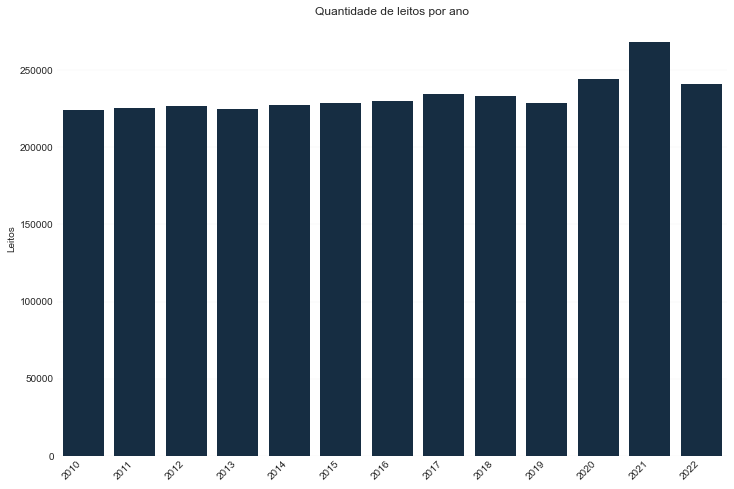

In [9]:
gr.plot_variaveis_barras(df=df, 
                      titulo = "Quantidade de leitos por ano",
                      ylabel = "Leitos",
                      lim = 101, 
                      figs = (12,8),
                      y = df.groupby(['DATA_COMPETEN_ANO']).sum()['QT_EXIST'],
                      x = df['DATA_COMPETEN_ANO'].unique(), 
                      hue=None,
                      palle=False)

### 2.3 Variação de leito por ano

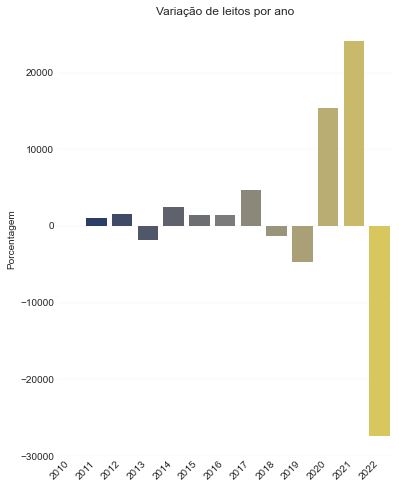

In [10]:
gr.plot_variaveis_barras(df=df, 
                      titulo = "Variação de leitos por ano",
                      ylabel = "Leitos",
                      palette = "cividis",
                      lim = 101, 
                      figs = (6,8),
                      y = df.groupby(['DATA_COMPETEN_ANO']).sum()['QT_EXIST'].diff(),
                      x = df['DATA_COMPETEN_ANO'].unique(), 
                      hue=None,
                      palle=True)

### 2.4 Variação de leito por ano (%)

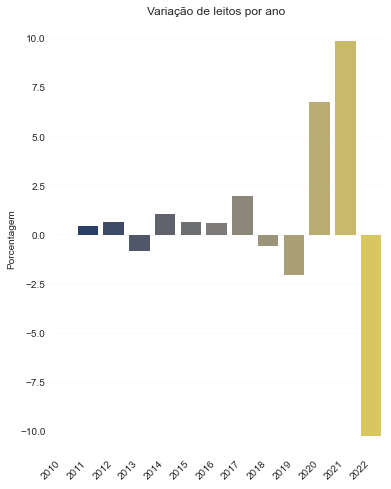

In [11]:
ser_var_leitos_per = (df.groupby(['DATA_COMPETEN_ANO']).sum()['QT_EXIST']
                      /((df.groupby(['DATA_COMPETEN_ANO']).sum()['QT_EXIST'].diff())
                        *-1+df.groupby(['DATA_COMPETEN_ANO']).sum()['QT_EXIST'])*100)-100

gr.plot_variaveis_barras(df=df, 
                      titulo = "Variação de leitos por ano",
                      ylabel = "Leitos",
                      palette = "cividis",
                      lim = 101, 
                      figs = (6,8),
                      y = ser_var_leitos_per,
                      x = df['DATA_COMPETEN_ANO'].unique(),
                      hue=None,
                      palle=True)

### 2.5 Variação de leito por mês do início da pademia até final de 2021

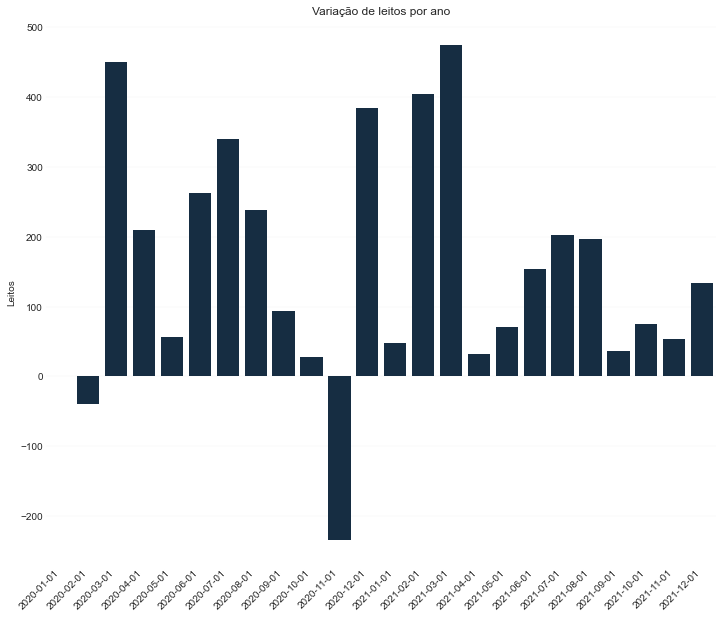

In [12]:
gr.plot_variaveis_barras(df=df, 
                      titulo = "Variação de leitos por ano",
                      ylabel = "Leitos",
                      palette = "cividis",
                      lim = 101, 
                      figs = (12,10),
                      y = df[(df['DATA_COMPETEN_ANO'] == 2020) | (df['DATA_COMPETEN_ANO'] == 2021)].groupby(['DATA_COMPETEN']).sum()['QT_EXIST'].diff(),
                      x = df[(df['DATA_COMPETEN_ANO'] == 2020) | (df['DATA_COMPETEN_ANO'] == 2021)]['DATA_COMPETEN'].unique(), 
                      hue=None,
                      palle=False)

### 2.6 Quantidade de leito sus e não sus antes e depois da pandemia

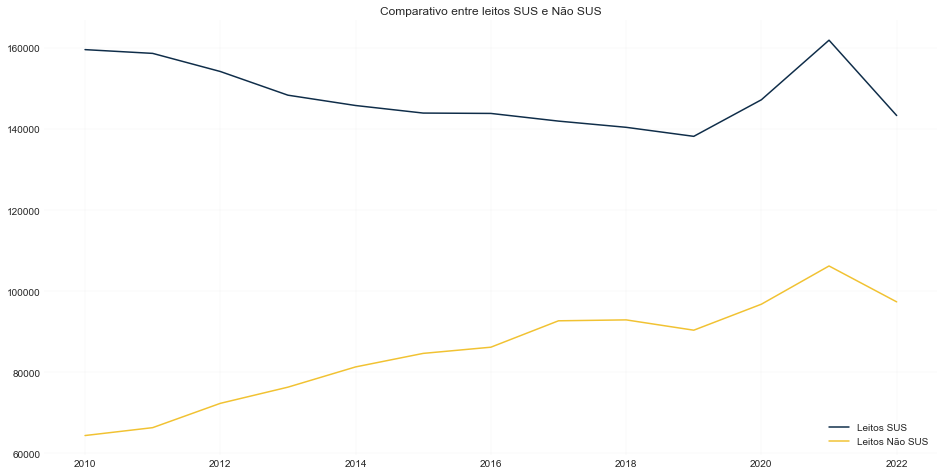

In [13]:
gr.plot_linhas_group(df.groupby(['DATA_COMPETEN_ANO']).sum()[['QT_SUS', 'QT_NSUS']],
                     [1,1,1],
                     ['Leitos SUS', 'Leitos Não SUS'],
                     (16,8),
                     "Comparativo entre leitos SUS e Não SUS")

### 2.7 Comparativo com a região centro-oeste

Antes é preciso deixar o dataset no mesmo padrão do ds de GO

In [11]:
zip_file = 'dados_lt-CO.zip'
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
except Exception as e:
    print("Invalid file", e)

df_co = pd.read_csv('dados-lt-CO.csv', encoding_errors='ignore')

C:\Users\YF427FW\AppData\Local\Temp\ipykernel_19240\1800515455.py:1: DtypeWarning: Columns (2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_co = pd.read_csv('dados-lt-CO.csv', encoding_errors='ignore')


In [13]:
## Tranformando o campo de competencia para o formato de DATA. Como é mensal, o dia sempre ficará como dia 1.
df_co['DATA_COMPETEN'] = pd.to_datetime(df_co['COMPETEN'], format='%Y%m').dt.date
df_co['DATA_COMPETEN_ANO'] = pd.to_datetime(df_co['COMPETEN'], format='%Y%m').dt.year
df_co['DATA_COMPETEN_MES'] = pd.to_datetime(df_co['COMPETEN'], format='%Y%m').dt.month

##remoção de algumas colunas que não serão utilizadas na análise

df_co.drop(['CNES', 
         'MICR_REG',
         'REGSAUDE',
         'DISTRSAN',
         'DISTRADM', 
         'TPGESTAO',
         'PF_PJ',
         'CPF_CNPJ',
         'ATIVIDAD',
         'NIV_DEP', 
         'CNPJ_MAN',
         'ESFERA_A',
         'RETENCAO',
         'NATUREZA',
         'CLIENTEL',
         'TP_UNID',
         'TURNO_AT',
         'NIV_HIER',
         'TERCEIRO', 
         'NAT_JUR',
         'COMPETEN',
         'QT_CONTR', ##Só possui 0
         'CODLEITO'], axis=1, inplace=True)

In [31]:
dfc1 = df_co.groupby(['DATA_COMPETEN_ANO']).sum()[['QT_EXIST']].rename(columns = {'QT_EXIST': 'QT_EXIST_CO'})
dfc2 = df.groupby(['DATA_COMPETEN_ANO']).sum()[['QT_EXIST']].rename(columns = {'QT_EXIST': 'QT_EXIST_GO'})

df_concat = pd.concat([dfc1, dfc2], axis=1)

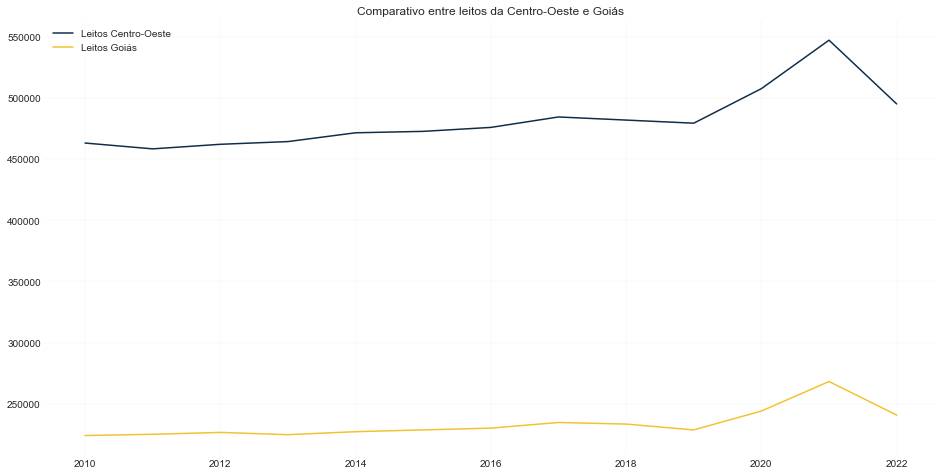

In [36]:
gr.plot_linhas_group(df_concat,
                     [1,1,1],
                     ['Leitos Centro-Oeste', 'Leitos Goiás'],
                     (16,8),
                     "Comparativo entre leitos da Centro-Oeste e Goiás")

## 3. Conclusão

De acordo com a proposta inicial da análise é possível deferir que:

    1. A quantidade de leitos se comporta de um jeito quase uniforme até o início da pandemia, e depois tem uma subida abrupta e, já no final do período mais crítico da pandemia, começa a cair e cai de forma abruta no ano de 2022, quase chegando a patamares anteriores à pandemia. 
    2. A variação na quantidade de leitos de ano a ano foi bastante grande positivamente em 20 e 21, chegando a subir até 10% em relação ao ano anterior, e caiu bastante também em 2022.
    3. A análise meês a mês foi feito apenas do ano de 2020, e percebe-se que em quase todos os meses foram contratados mais leitos.
    4 Em relação à quantidade de leitos sus e não sus, é possível perceber que há um crescimento maior dos leitos não sus antes da pandemia, e depois da pandemia a queda é menos ascentuada.
    5 E em comparação com a Região Centro-Oeste, Goiás se mostrou quase a mesma evolução  